# Noteboook sobre TSNE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.manifold
import glob
import sklearn.cluster

Para el desarrollo de este notebook, usé 250 imagenes de cinco categorías: edificios class=0, bosques class=1, glaciares class=2, mares class=3 y calles class=4. Estas imagenes están en formato .jpg y tienen tamaño de 150x150x3. En realidad en el dataset venían alrededor de 6000 imagenes pero debido a la capacidad del pc que tengo en casa (ram y procesador) y a la mala conexión a internet obté por seleccionar aleatoriamente 50 imagenes de cada clase y trabajar con esas. 

In [3]:
files1 = glob.glob('/buildings1/*.jpg')
buildings = []
for filename in files1:
    im = np.float_(plt.imread(filename).flatten())
    buildings.append(im)
    
files2 = glob.glob('/forest1/*.jpg')
forest = []
for filename in files2:
    im = np.float_(plt.imread(filename).flatten())
    forest.append(im)
    
files3 = glob.glob('/glacier1/*.jpg')
glacier = []
for filename in files3:
    im = np.float_(plt.imread(filename).flatten())
    glacier.append(im)
    
files5 = glob.glob('/sea1/*.jpg')
sea = []
for filename in files5:
    im = np.float_(plt.imread(filename).flatten())
    sea.append(im)
    
files6 = glob.glob('/street1/*.jpg')
street = []
for filename in files6:
    im = np.float_(plt.imread(filename).flatten())
    street.append(im)

print(np.shape(buildings),np.shape(forest),np.shape(glacier),np.shape(sea),np.shape(street))

(50, 67500) (50, 67500) (50, 67500) (50, 67500) (50, 67500)


Primero leemos los archivos ya aplanados. Posteriormente juntamos las cinco clases en X y creamos el target por cada clase.

In [4]:
X = buildings + forest + glacier + sea + street

t1 = np.full(50, 0)
t2 = np.full(50, 1)
t3 = np.full(50, 2)
t4 = np.full(50, 3)
t5 = np.full(50, 4)
Y = np.concatenate((t1,t2,t3,t4,t5))
print(np.shape(X), np.shape(Y))

(250, 67500) (250,)


## TSNE

Realizamos varios fit con diferentes valores de perplexity. Para valores mayores a 10 los gráficos son muy similares, por lo tanto solo se muestran los que tienen cambios en la forma de agrupar los datos.

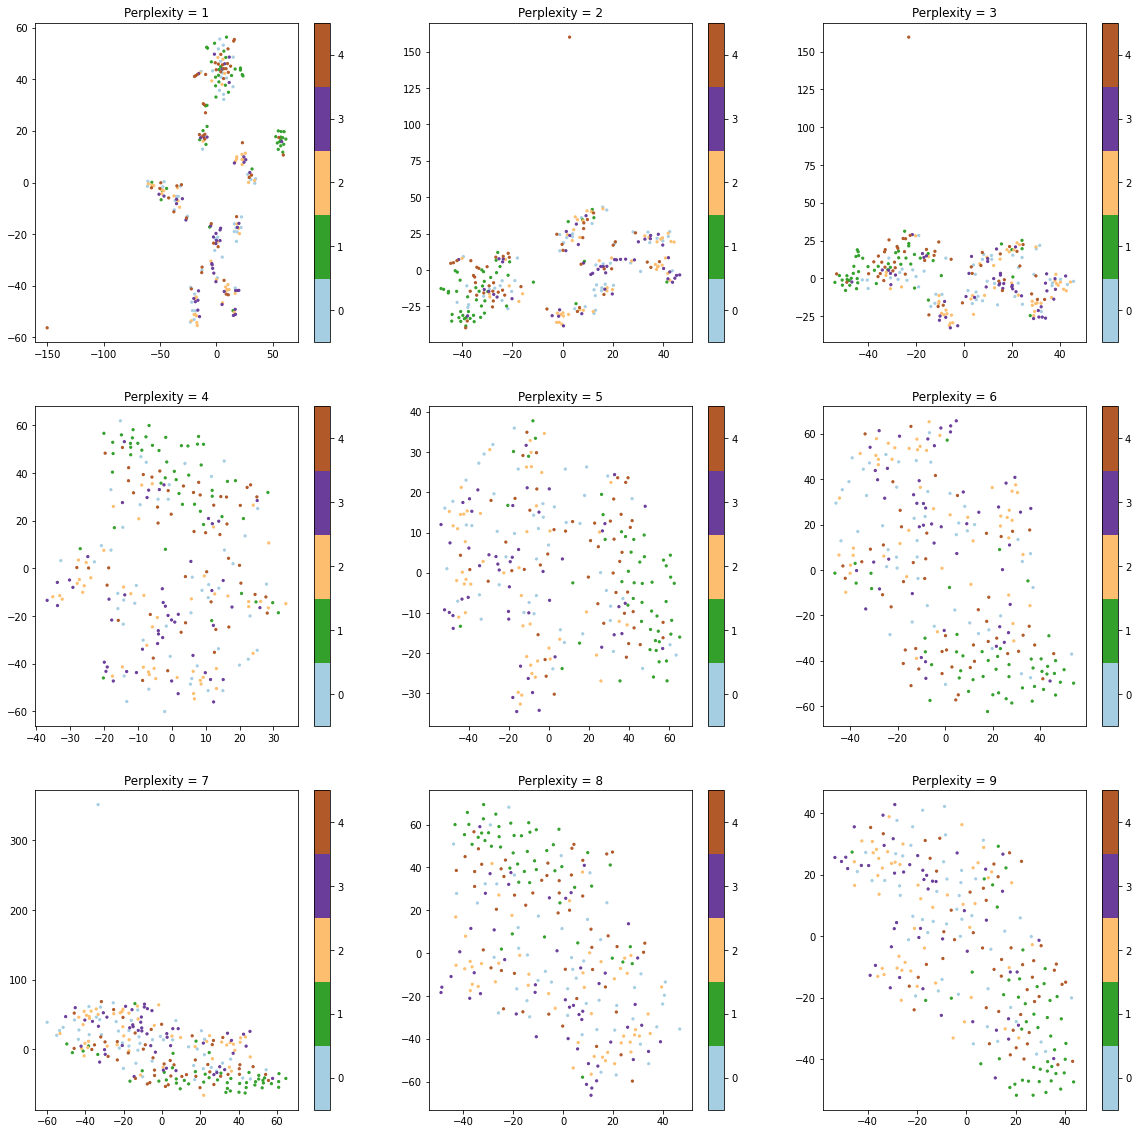

In [15]:
perplexity = np.arange(1,10,1)
plt.figure(figsize=(20,20))
for i in perplexity:
    tsne = sklearn.manifold.TSNE(perplexity=i)
    tsne.fit(X)
    embedding = tsne.embedding_
    plt.subplot(3,3,i)
    plt.scatter(embedding[:,0], embedding[:,1], c=Y, cmap='Paired', s=5.0)
    plt.title("Perplexity = {:.0f}".format(i))
    plt.colorbar(boundaries=np.arange(6)-0.5).set_ticks(np.arange(5))
plt.savefig('perplexity_values.png')

Tomamos perplexity = 9 para realizar el fit sobre las imagenes.

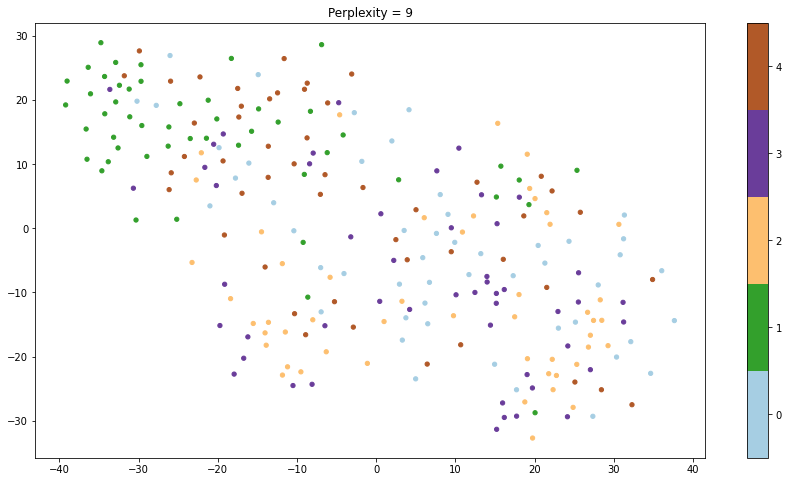

In [17]:
tsne = sklearn.manifold.TSNE(perplexity=9)
tsne.fit(X)
embedding = tsne.embedding_
plt.figure(figsize=(15,8))
plt.scatter(embedding[:,0], embedding[:,1], c=Y, cmap='Paired', s=18.0)
plt.title("Perplexity = {:.0f}".format(9))
plt.colorbar(boundaries=np.arange(6)-0.5).set_ticks(np.arange(5))

Usando el fit, encontramos los cinco clusters que agrupan las imagenes. 

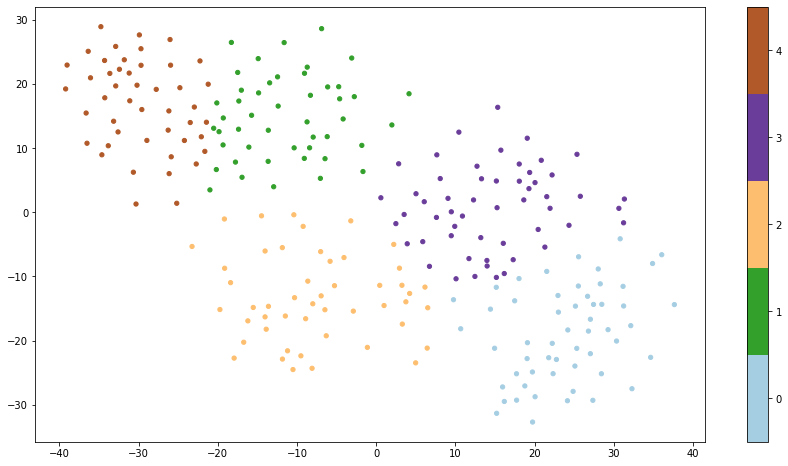

In [19]:
# clusters sobre los resultados de tsne
n_clusters = 5
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding)
plt.figure(figsize=(15,8))
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=18)
plt.colorbar(boundaries=np.arange(6)-0.5).set_ticks(np.arange(5))
plt.savefig('kmeans_cluster.png')

Con la clasificación de cada imagen, graficamos las mas cercanas al los clusters. Sin embargo, para este dataset no se tiene una buena clasificación. Pues en algunos casos clasifica imagenes que no son de su respectiva clase, por ejemplo: glaciares en la clase de edificios, etc.

Es probable que la mala clasificación del algoritmo se deba a la poca cantidad de imagenes y a la gran cantidad de colores que se tienen en cada una de ellas. Intentaré probar con otros datasets donde las imagenes estén en escals de grises para probar si la clasificación da mejor.

(250, 150, 150, 3)


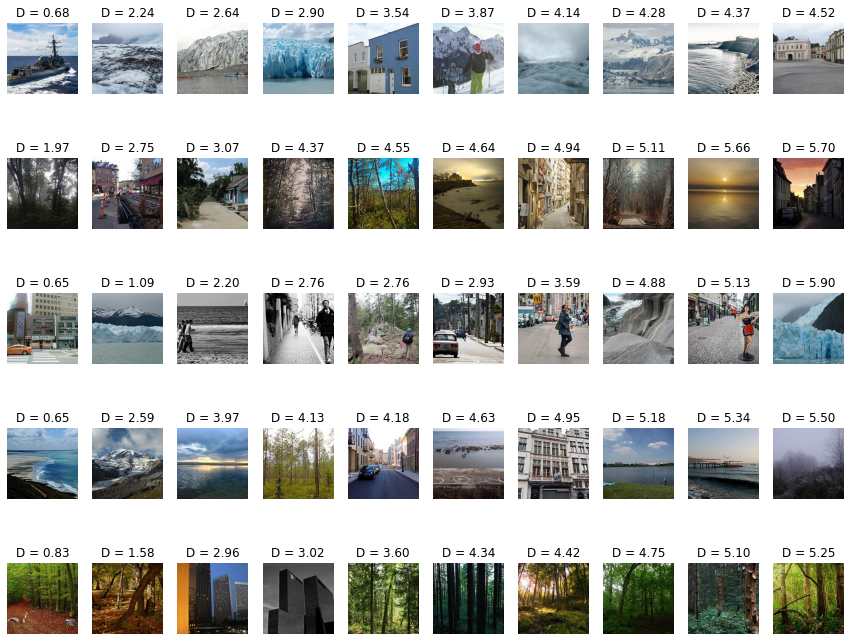

In [23]:
n_imagenes = len(X)
imagenes = np.array(X)
imagenes = imagenes.reshape((n_imagenes, 150, 150,3))
print(np.shape(imagenes))

plt.figure(figsize=(15,12))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i]) # es el orden de los objetos de menor a mayor a la distancia de su cluster
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow((imagenes[ind]).astype(np.uint8))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')
plt.savefig('clasificacion.png')